# Limitations of the maximal margin classifier

(2) Sensitive to data
<img src="images/9.5-1.png" style="width:70%;height:70%;"/>

* May want to choose hyperplane that misclassifies in order to acheive:
    1. Robustness to noise/mislabeling
    2. Better classification of most observations


# Q4: The support vector classifier

<img src="images/9.3-1.png" style="width:30%;height:30%;" align="right"/>   
* Reminder: Maximal margin classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1 & \text{for all }i
\end{array}
$
</center>
<br>
* Observations on the margins: $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) = 1$ (support vectors)
* Use "soft margines"
    - Allow observations to be on the wrong side of the marings (and the hyperplane)
    - Add Penalty to the objective of the optimization problem 


# Q4: The support vector classifier

<img src="images/9.3-1.png" style="width:30%;height:30%;" align="right"/>   
* Reminder: Maximal margin classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1 & \text{for all }i
\end{array}
$
</center>
<br>
* Observations on the margins: $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) = 1$ (support vectors)
* Use "soft margines"
    - Allow observations to be on the wrong side of the marings (and the hyperplane)
    - Add Penalty to the objective of the optimization problem 
<br><br>
* Support vector classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2 + C\sum_{i=1}^{n} \epsilon_i\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1-\epsilon_i & \text{for all }i\\
& \epsilon_i \geq 0 & \text{for all }i\\
\end{array}
$
</center>


# Q4: The support vector classifier - cont.

<table align="right">
    <tr><td>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2 + C\sum_{i=1}^{n} \epsilon_i\\
s.t. & y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p}) \geq 1-\epsilon_i & \text{for all }i\\
& \epsilon_i \geq 0 & \text{for all }i\\
\end{array}
$
        </td></tr></table>

* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>1$ : out of margin 
* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})=1$ : on the margin
* $1>y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})>0$ : on the wrong side of margin
* $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})<0$ :
on the wrong side of the hyperplane
* Support vectors: 
    - $y_i(\beta_{0}+\beta_1 x_{i,1} + ... + \beta_p x_{i,p})= 1$
    - more support vectors (reduces variance)
* Tradeoff between the size of the margin and their violation 
* Sensitivity to the magnitude of each feature
<img src="images/9.6-1.png" style="width:80%;height:80%;"/>   

* Answered question 4 (what if the observations are not separable?)


# Exercise 4: support vector classifier

The file ex4data.csv contains information about 2-dimensional data points and their class. 
1. Plot the data.
2. Is the data linearly separable? 
3. Plot the separating plane and margins for C=0.02, 0.05, 0.1, 1

# Solution to Exercise 4


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [41]:
df1 = pd.read_csv('ex2data.csv')
df1.shape

(20, 3)

Text(0.5,1,'Exercise 4 data')

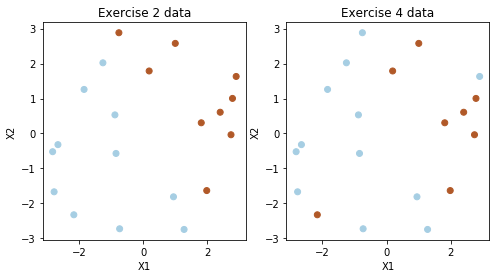

In [42]:
# load data
df1 = pd.read_csv('ex2data.csv')
df2 = pd.read_csv('ex4data.csv')

# plot
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].scatter(df1['X1'], df1['X2'], c=df1['class'], cmap=plt.cm.Paired)
#try  axes[i].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.RdGy)
#try  axes[i].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.autumn)
#try  axes[i].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Greens)
   
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Exercise 2 data')


axes[1].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Paired)
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('Exercise 4 data')

In contrast to exercise 2, the new data is not linearily separable (a red observation is surrounded by blue observations)

# Solution to Exercise 4 - cont.


In [43]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.1)
clf.fit(df2[['X1','X2']], df2['class'])   #try clf.fit(df[['X1','X2']], df['c'])

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
# print beta (the hyperplane coefficents) and the support vectors
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2) #M = 1/||β||
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)

beta0= -0.45 
beta1=  0.53 
beta2=  0.06
Margin: 1.870799191193402
support vectors indexes: [ 1  4 11 12 13 14 15 17  0  2  6  7  9 10 16]


(-3, 4)

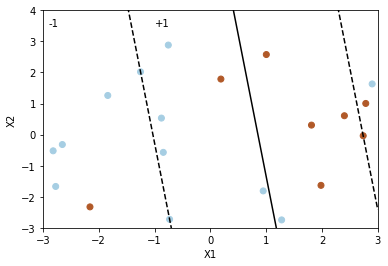

In [45]:
# plot hyperplane, margins and support vectors
fig, ax = plt.subplots()
ax.scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Paired)
X1_range = [-3,3]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
#X2 =( -β0 –β1X1 )/β2
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
#try X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
ax.plot(X1_range,X2_hyperplane,'-k')
ax.plot(X1_range,X2_margin1,'--k')
# try ax.plot(X1_range,X2_margin1,'-.c')
ax.plot(X1_range,X2_margin2,'--k')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.text(-1, 3.5, '+1')
ax.text(-2.9, 3.5, '-1')
ax.set_xlim([-3,3])
ax.set_ylim([-3,4])  

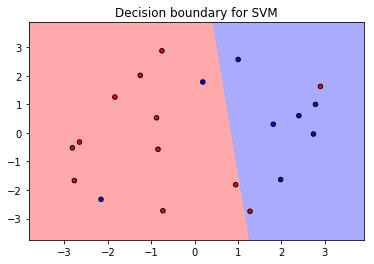

In [46]:
X = df2[['X1','X2']] # use only two features for prediction
Y = df2['class']

from tools import * # the file tools.py contains the function 
plot_decision_boundary_2d(df=X, Y=Y, clf=clf, title='Decision boundary for SVM')

In [47]:
clf.support_vectors_[:,0]

array([ 1.27735382, -1.25166708, -0.7535161 , -0.8770858 , -0.7303931 ,
        0.9471728 , -0.84328109,  2.89964919, -2.15736287,  1.98285807,
        2.73926463,  1.00301292,  0.18896567,  1.81241114,  2.40220471])

In [48]:
clf.support_vectors_[:,1]

array([-2.74581572,  2.02194219,  2.88279875,  0.53197293, -2.72693572,
       -1.8121032 , -0.57135823,  1.6315852 , -2.32650004, -1.63355404,
       -0.03632847,  2.57771244,  1.78847412,  0.30596382,  0.60766303])

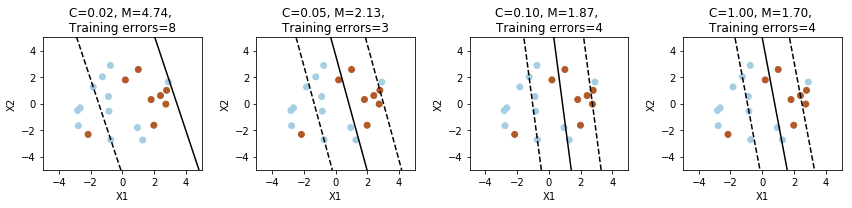

In [49]:
C_range = [0.02, 0.05, 0.1, 1]
fig, axes = plt.subplots(1,len(C_range), figsize=(12,3))
l=5 # display parameter

for i in range(len(C_range)):
    clf = svm.SVC(kernel='linear',C=C_range[i])
    clf.fit(df2[['X1','X2']], df2['class'])

    beta1,beta2 = clf.coef_[0]
    beta0 = clf.intercept_[0]
    M = 1/np.sqrt(beta1**2+beta2**2) # margin
    training_error=sum(clf.predict(df2[['X1','X2']])!=df2['class'])
    axes[i].scatter(df2['X1'], df2['X2'], c=df2['class'], cmap=plt.cm.Paired)
    
    X1_range = [-l,l]
    X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
    X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
    X2_margin2 = list(map(lambda x1:(-beta0+1-beta1*x1)/beta2, X1_range))

    axes[i].plot(X1_range,X2_hyperplane,'-k')
    axes[i].plot(X1_range,X2_margin1,'--k')
    axes[i].plot(X1_range,X2_margin2,'--k')
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')
    axes[i].set_xlim([-l,l])
    axes[i].set_ylim([-l,l])    
    axes[i].set_title("C=%.2f, M=%.2f, \nTraining errors=%d"%(C_range[i],M,training_error))
        
fig.tight_layout()

# Solution to Exercise 4 - cont.


In [50]:
from sklearn.model_selection import cross_val_score # cross validation
X=df2[['X1','X2']]
Y=df2['class']
clf = svm.SVC(kernel='linear',C=0.1)  
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("C=%.2f Accuracy: %0.2f (+/- %0.2f)" % (0.1,scores.mean(), scores.std()))    

[0.8        1.         0.25       0.66666667 1.        ]
C=0.10 Accuracy: 0.74 (+/- 0.28)


In [51]:
for i in np.linspace(0.01,1,12): 
    print(i)

0.01
0.09999999999999999
0.19
0.28
0.37
0.45999999999999996
0.55
0.64
0.73
0.82
0.9099999999999999
1.0


In [52]:
for i in np.logspace(-3, 1, 4):
    print(i)

0.001
0.021544346900318832
0.46415888336127775
10.0


In [53]:
# cross validation
X=df2[['X1','X2']]
Y=df2['class']
results=[]

#for i in np.linspace(0.01,1,100): 
#for i in np.logspace(-4,3,10,base=2): 
for i in np.logspace(-3, 1, 10):
    clf = svm.SVC(kernel='linear',C=i)  
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])
    
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std'])
df_accuracy

,C,mean,std
0,0.001000,0.606667,0.061101
1,0.002783,0.606667,0.061101
2,0.007743,0.606667,0.061101
3,0.021544,0.606667,0.061101
4,0.059948,0.743333,0.277208
5,0.166810,0.793333,0.193678
6,0.464159,0.753333,0.208273
7,1.291550,0.753333,0.208273
8,3.593814,0.753333,0.208273
9,10.000000,0.753333,0.208273


In [54]:
a = np.linspace(0.01,1,10)
print (a)

[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


# Solution to Exercise 4 - cont.


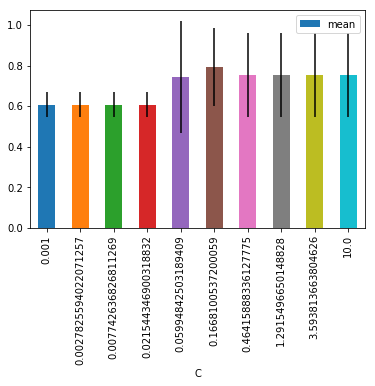

In [55]:
# plot test error per tree depth
df_accuracy.plot.bar(x='C',y='mean',yerr='std')

Lower values of C lead to less variable classifiers (but with more bias)

# Q5: Support vector machine * 

- If data is "almost" separable, use support vector classifier
<!--- Other linear classifiers: logistic regression, LDA-->
<!--- Why do we need another one? -->
- What if its fundamentally different? 
- Example:

<table>
    <tr>
        <th>$X_1$</th>
        <td>4</td>
        <td>3</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
        <td>-1</td>
        <td>-2</td>
        <td>-3</td>
        <td>-4</td>
    </tr>
    <tr>
        <th>$Y$</th>
        <td>+1</td>
        <td>+1</td>
        <td>+1</td>
        <td>-1</td>
        <td>-1</td>
        <td>-1</td>
        <td>+1</td>
        <td>+1</td>
        <td>+1</td>
    </tr>  
</table>  

- Is the data linearly separable?
- Can a linear classifier work well?

# Expanding the feature space

* Use a linear classifier to create a non-linear classifier
* Example 1: 
    - Orignal feature space: $(x_1)$
    - Extended feature space: $(x_1,x_1^2)$ <!--or $(1,\sqrt{2}x_1,x_1^2)$-->
* Example 2: 
    - Orignal feature space: $(x_1,x_2)$ 
    - Extended feature space: $(x_1,x_2,x_1x_2, x_1^2, x_2^2)$ <!--or $(1,\sqrt{2}x_1,\sqrt{2}x_2,\sqrt{2}x_1x_2, x_1^2, x_2^2)$-->

<table border="0" style="width:70%;height:40%;float: center;">
    <tr>
        <td>
            <center> Original feature space</center>
    <table border="1" >
        <tr>
            <th>$X_1$</th>
            <th>$X_2$</th>
            <th>$Y$</th>
        </tr>
        <tr>
            <td>$x_{1,1}$</td>
            <td>$x_{1,2}$</td>
            <td>$Y_1$</td>
        </tr>
        <tr>
            <td>$x_{2,1}$</td>
            <td>$x_{2,2}$</td>
            <td>$Y_2$</td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>    
        <tr>
            <td>$x_{n,1}$</td>
            <td>$x_{n,2}$</td>
            <td>$Y_n$</td>
        </tr>
    </table>

</td><td>            <center> Expanded feature space</center>

<table border="1">
    <tr>
        <th>$X_1$</th>
        <th>$X_2$</th>
        <th>$X_1X_2$</th>
        <th>$X_1^2$</th>
        <th>$X_2^2$</th>
        <th>$Y$</th>
    </tr>
    <tr>
        <td>$x_{1,1}$</td>
        <td>$x_{1,2}$</td>
        <td>$x_{1,1}x_{1,2}$</td>
        <td>$x_{1,1}^2$</td>
        <td>$x_{1,2}^2$</td>
        <td>$Y_1$</td>
    </tr>
    <tr>
        <td>$x_{2,1}$</td>
        <td>$x_{2,2}$</td>
        <td>$x_{2,1}x_{2,2}$</td>
        <td>$x_{2,1}^2$</td>
        <td>$x_{2,2}^2$</td>
        <td>$Y_2$</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>    
    <tr>
        <td>$x_{n,1}$</td>
        <td>$x_{n,2}$</td>
        <td>$x_{n,1}x_{n,2}$</td>
        <td>$x_{n,1}^2$</td>
        <td>$x_{n,2}^2$</td>
        <td>$Y_n$</td>
    </tr>
</table>
   
    
</td></tr>    
</table>

* Is there a computation overhead in adding features? 
     



- __In SVM there is no computational overhead for many types of feature expansion!__ 
    * Kernel trick



# Support vector machine - cont. *
\* assumes familiarity with convex optimization

* Support vector classifier
<center>
$
\begin{array}{lll}
\min & \frac{1}{2}||\beta||^2 + C\sum_{i=1}^{n} \epsilon_i\\
s.t. & y_i(\beta_0+\beta_{1} x_{i,1} + ... + \beta_p x_{i,p}) \geq 1-\epsilon_i & \text{for all }i\\
& \epsilon_i \geq 0 & \text{for all }i\\
\end{array}
$
</center>

* Dual problem: 
<center>
$
\begin{array}{lll}
\max & \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jK(\bar{x}_i,\bar{x}_j)\\
   s.t. & 0 \leq \alpha_i \leq C & \text{for all }i\\
        & \sum_{i=1}^{n}\alpha_iy_i=0 & \\
\end{array}
$
</center>

where $K(\bar{x}_i,\bar{x}_j)=\sum_{t=1}^{p}x_{i,t}x_{j,t}$ is the linear kernel

# Support vector machine - cont. *
Observations: 
- $\min \rightarrow \max$
- $\beta,\epsilon \rightarrow \alpha$
    - primal problem: variable for each feature (and error terms for each feature)
    - dual problem: variable for each observation

- What happens to each formulation if there are additional $10^6$ features? 
    - primal: optimization problem becomes more difficult (more variables) 
    - dual: more setup work in calculating the Kernel
        - We only need the information about the product of feature vectors
        - Suppose each vector has two features: $\bar{x}_i = (x_{i,1},x_{i,2})$
        <center>
        $K(\bar{x}_i,\bar{x}_j) = K((x_{i,1},x_{i,2}),(x_{j,1},x_{j,2})) = x_{i,1}x_{j,1}+x_{i,2}x_{j,2}$
        </center>

        - Extended feature space: $\bar{x}_i = (1,\sqrt{2}x_{i,1},\sqrt{2}x_{i,2},\sqrt{2}x_{i,1}x_{i,2}, x_{i,1}^2, x_{i,2}^2)$
<center>
$K(\bar{x}_i,\bar{x}_j) = 1+2x_{i,1}x_{j,1}+2x_{i,2}x_{j,2}+2x_{i,1}x_{i,2}x_{j,1}x_{j,2}+ x_{i,1}^2x_{j,1}^2+ x_{i,2}^2x_{j,2}^2  = (1+x_{i,1}x_{j,1}+x_{i,2}x_{j,2})^2$
</center>


- __The same computational effort with an exponential (and potentially infinite) number of features!__

#  Support vector machine - cont. *

* $\beta$ - separating hyperplane equation. 
* Classified based on the sign of $\beta_0+\beta_1 x_1 + ... + \beta_p x_p$ 

* How do we classify now? 
    - In the optimization we compute $\alpha$ and not $\beta$
    * Classifying new points:
    <center>
    $\beta_0+\beta_1 x_1 + ... + \beta_p x_p
    =\sum_{i\in \{1..n\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0
    =\sum_{i\in\{SV\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0$
    </center>
    * clf.predict(list_of_observations) - returns a same-size array of predictions


# Kernels

* How to think about kernels?


* Kernel: a trick that allows adding features for free
    * Polynomial kernel of degree 1 (Linear kernel) uses the original feature space = support vector classifier
    * Polynomial kernel of degree 2 adds the features $x_1^2$, $x_2^2$, $x_1x_2$, ...
    * Polynomial kernel of degree 3 adds the features $x_1^2$, $x_1^3$, $x_1x_2$, $x_1^2x_2$, $x_1x_2^2$, ...
    * Polynomial kernel of degree $d$ adds features of the form $x_{1}^2$,$x_{1}^3$,...,  $x_{1}^d$, $x_{1}x_{2}$, $x_{1}x_{2}^{d-1}$ etc.
<!---* Revisit the optimization problem--->
<!---center>
$
\begin{array}{lll}
\max & \sum_{i=1}^{n}\alpha_i - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jy_iy_jK(\bar{x}_i,\bar{x}_j)\\
   s.t. & 0 \leq \alpha_i \leq C & \text{for all }i\\
        & \sum_{i=1}^{n}\alpha_iy_i=0 & \\
\end{array}
$
</center--->

# Kernels - cont.


* Kernel: a measure of the similarity of two observations
    * Alternative approach of the classification problems
    * Circumvent the need to define features
    * Polynomial kernel: $(1+<\bar{x}_i,\bar{x}_j>)^d$ (dot product https://en.wikipedia.org/wiki/Dot_product)
    * Radial basis kernel: 
        - $K(\bar{x}_i,\bar{x}_j)=e^{-\gamma\sum_{t=1}^{p}(x_{i,t}-x_{j,t})^2}$
    <!-- - prediction: $\sum_{i\in\{SV\}} \alpha_iy_iK(\bar{x},\bar{x}_i) + \beta_0>0$-->

* Which kernel should we use? 
    - overfitting vs. underfitting


# Exercise 5: support vector machine
1. Plot the data in the file data/ex5data.csv
2. Is the data linearily separable?
3. Fit the data to an SVM model with a polynomial kernel of degree 2 and tuning parameter C=10 (clf = svm.SVC(kernel='poly',C=10, degree=2))
4. Visualize the prediction of the classifier (i.e., the different regions of classification)
5. What is the number of training errors?
6. Repeat the fitting with C=[0.01,0.1,1]. What is the influence of C?

# Solution to exercise 5

In [57]:
df.head()

,Unnamed: 0,X1,X2,Y
0,0,6,-9,False
1,1,7,5,False
2,2,-2,4,True
3,3,0,-2,True
4,4,-8,1,False


TypeError: 'str' object is not callable

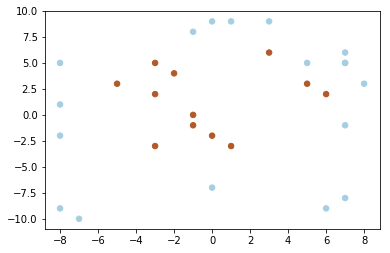

In [56]:
# load data
df = pd.read_csv('ex5data.csv')

# plot
fig, ax = plt.subplots()
plt.scatter(df['X1'], df['X2'], c=df['Y'], s=30, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
df.head()

The data is not linearlity separable

# Solution to exercise 5 - cont.

In [ ]:
clf = svm.SVC(kernel='poly', degree=2, C=10) # fit SVM with polynomial kernel 
clf.fit(df[['X1','X2']], df['Y'])

In [ ]:
# plot predictions
fig, ax = plt.subplots()
r=15
support = [(i,j) for i in np.linspace(-r,r,31) for j in np.linspace(-r,r,31)]
df_background = pd.DataFrame(data=support, columns=['X1','X2'])
df_background['prediction']=clf.predict(support) 
df_background[df_background['prediction']==True].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=ax,label='Predict True')
df_background[df_background['prediction']==False].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=ax,label='Predict False')
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])

# plot observations
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired,s=60)

# plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')
# try ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='black')

# Solution to exercise 5 - cont.

In [ ]:
# Compute the number of training errors
df['prediction']=clf.predict(df[['X1','X2']])
df.head()

In [ ]:
training_errors = (df['Y']!=df['prediction']).sum()
training_errors

In [ ]:
# percent of correct classifications in the training data
clf.score(df[['X1','X2']],df['Y'])

# Solution to exercise 5 - cont.

In [ ]:
# Repeat with multiple values of C
C_range = [0.01,0.1,1]
fig, axes = plt.subplots(1,len(C_range), figsize=(10,4))

for i in range(len(C_range)):
    C_ = C_range[i]
    
    # fit SVM with polynomial kernel 
    clf = svm.SVC(kernel='poly',C=C_, degree=2)
    clf.fit(df[['X1','X2']], df['Y'])

    # plot predictions
    l=15
    support = [(k,j) for k in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
    df_bg = pd.DataFrame(data=support, columns=['X1','X2'])
    df_bg['prediction']=clf.predict(support) 
    df_bg[df_bg['prediction']==True].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=axes[i])
    df_bg[df_bg['prediction']==False].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=axes[i])
    axes[i].set_xlim([-l,l])
    axes[i].set_ylim([-l,l])

    # plot observations
    axes[i].scatter(df['X1'], df['X2'], c=df['Y'], cmap=plt.cm.Paired,s=60)
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=120, facecolors='none')
    training_errors = (df['Y']!=clf.predict(df[['X1','X2']])).sum()
    axes[i].set_title('C=%.2f\n Support vectors:%d\n Training errors:%d'%(C_,clf.support_.shape[0],training_errors))
    
fig.tight_layout()

Observation: the number of training errors and support vectors tend to increase

# Multiclass classification

<img src="images/multiclass-data.png" stylex="width:300px;height:300px;" align="right"/>
* What if we have T classes?
* Example: 
    - multiple types of diseases
    - surgery durations: short, medium, long




# Multiclass classification - One-versus-one

- fit classification models for each pair of classes (${T \choose 2}$ in total)
- classify according to the largest number of 'votes'
    
<img src="images/multiclass-one-vs-one.png" stylex="width:300px;height:300px;"/>

- Classify the point (3,3)



# Multiclass classification - One-versus-all

<img src="images/multiclass-data.png" style="width:200px;height:200px;" align="right"/>

- fit classification models for each of the classes ($T$ in total)
- for each class the model returns a hyperplane $(\beta_{i,0},\beta_{i,1},...,\beta_{i,p})$
- classify based on the largest value of $\beta_{i,0} + \beta_{i,1}x_1 + ... + \beta_{i,p}x_p$

<img src="images/multiclass-one-vs-all2.png" stylex="width:300px;height:300px;"/>
 
- Classify the point (3,3)


# Exercise 6: multiclass classification

In [ ]:
# load data
df_multiclass = pd.read_csv('data/multiclass.csv')
df_multiclass.head()

In [ ]:
df_multiclass.shape

In [ ]:
# visualize
fig,ax=plt.subplots()
df_multiclass[df_multiclass['Y']=='Red'].plot.scatter('X1','X2',color='r', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Blue'].plot.scatter('X1','X2',color='b', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Green'].plot.scatter('X1','X2',color='g', s=25,ax=ax)

# Exercise 6: multiclass classification - cont.

In [ ]:
# fit SVM with one-vs-one
clf = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo') # ovo: one versus one
clf = clf.fit(X=df_multiclass[['X1','X2']],y=df_multiclass['Y']) 

In [ ]:
# plot predictions
fig,ax=plt.subplots()
l=4
support = [(k,j) for k in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
df_bg = pd.DataFrame(data=support, columns=['X1','X2'])
df_bg['prediction']=clf.predict(support) 
df_bg[df_bg['prediction']=='Red'].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=ax)
df_bg[df_bg['prediction']=='Blue'].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=ax)
df_bg[df_bg['prediction']=='Green'].plot.scatter('X1','X2',color='g',alpha=.2, s=25,ax=ax)
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])

# plot observations
df_multiclass[df_multiclass['Y']=='Red'].plot.scatter('X1','X2',color='r', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Blue'].plot.scatter('X1','X2',color='b', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Green'].plot.scatter('X1','X2',color='g', s=25,ax=ax)
plt.gca().set_xlim([-l,l])
plt.gca().set_ylim([-l,l])

# Exercise 6: multiclass classification - cont.

In [ ]:
# fit SVM with one-vs-all
clf = svm.SVC(kernel='linear',C=1,decision_function_shape='ovr') # ovr: one versus one
#clf = svm.SVC(kernel='linear',C=1,decision_function_shape='ovr') # ovr: one versus rest
clf = clf.fit(X=df_multiclass[['X1','X2']],y=df_multiclass['Y']) 

In [ ]:
# plot predictions
fig,ax=plt.subplots()
l=4
support = [(k,j) for k in np.linspace(-l,l,31) for j in np.linspace(-l,l,31)]
df_bg = pd.DataFrame(data=support, columns=['X1','X2'])
df_bg['prediction']=clf.predict(support) 
df_bg[df_bg['prediction']=='Red'].plot.scatter('X1','X2',color='r', alpha=.2, s=25,ax=ax)
df_bg[df_bg['prediction']=='Blue'].plot.scatter('X1','X2',color='b',alpha=.2, s=25,ax=ax)
df_bg[df_bg['prediction']=='Green'].plot.scatter('X1','X2',color='g',alpha=.2, s=25,ax=ax)
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])

# plot observations
df_multiclass[df_multiclass['Y']=='Red'].plot.scatter('X1','X2',color='r', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Blue'].plot.scatter('X1','X2',color='b', s=25,ax=ax)
df_multiclass[df_multiclass['Y']=='Green'].plot.scatter('X1','X2',color='g', s=25,ax=ax)
plt.gca().set_xlim([-l,l])
plt.gca().set_ylim([-l,l])

# SK-learn algorithms for SVM

<img src="images/table5-1.png" style="width:50%;height:50%;" align="center"/>

* LinearSVC - gradient based method for linear kernels (very efficient, only linear kernel)
* SGDClassifier - stochastic gradient method (very large datasets, only linear kernel)
* SVC - solves the dual problem (relatively small datasets, many kernels)

# Additional applications of SVM

- Kernel methods enable predictions on objects without implicitly specifying their features


# Summary - SVM

* One of the most widely used algorithms
* Extremely efficient in implementing high dimensional feature spaces 
* Versatile - can be applied to complex objects (strings, graphs)
* Extensions
    - Multiclass classification
    - Estimating probabilities that an obeservation belongs to each class
    - Support vector regression - prediction of continuous values 
